# Generate DEBMDK PaletteViz 
## Code to generate 4D DEBMDK PaletteViz plots for EMO-2021

This notebook generates different plots for 8D DEBMDK for EMO-2021 paper.

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})
np.random.seed(123456)

### Get appropriate color codings and other markings

In [2]:
sys.path.append('../../')
from vis.plotting.utils import resize_by_tradeoff, color_by_dist, color_by_cv, enhance_color

def load_props(path):
    r"""
    Load CV, Mu, Ik and S from path.
    """
    CV = None
    cvpathf = os.path.join(path, "datacv.csv")
    if os.path.exists(cvpathf):
        CV = np.loadtxt(cvpathf)

    # load the Mu values
    Mu = None
    mupathf = os.path.join(path, "mu.csv")
    if os.path.exists(mupathf):
        Mu = np.loadtxt(mupathf)

    # load the knee indices
    Ik = None
    kpathf = os.path.join(path, "muid.csv")
    if os.path.exists(kpathf):
        Ik = np.loadtxt(kpathf, dtype = int)
        
    return CV, Mu, Ik

def decide_size_color(CV, Mu, Ik):
    r"""
    Decide point-size and color from `CV`, `Mu` and `Ik`
    """
    # decide point-size
    S = 1
    if Mu is not None and Ik is not None:
        S = resize_by_tradeoff(Mu, k=Ik)

    # decide colors
    # C = default_color(F.shape[0], alpha=0.5)
    M = np.mean(F, axis=0)
    C, _ = color_by_dist(F, M, 0.15)
    
    # if CV is available, use CV to color
    if CV is not None:
        C = color_by_cv(CV, 0.15)

    # enhance knee points
    if Ik is not None:
        C = enhance_color(C, Ik)
    return S, C

### Now do a scatter plot with appropriate colorcodings and markings

../../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', '..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


<IPython.core.display.Javascript object>


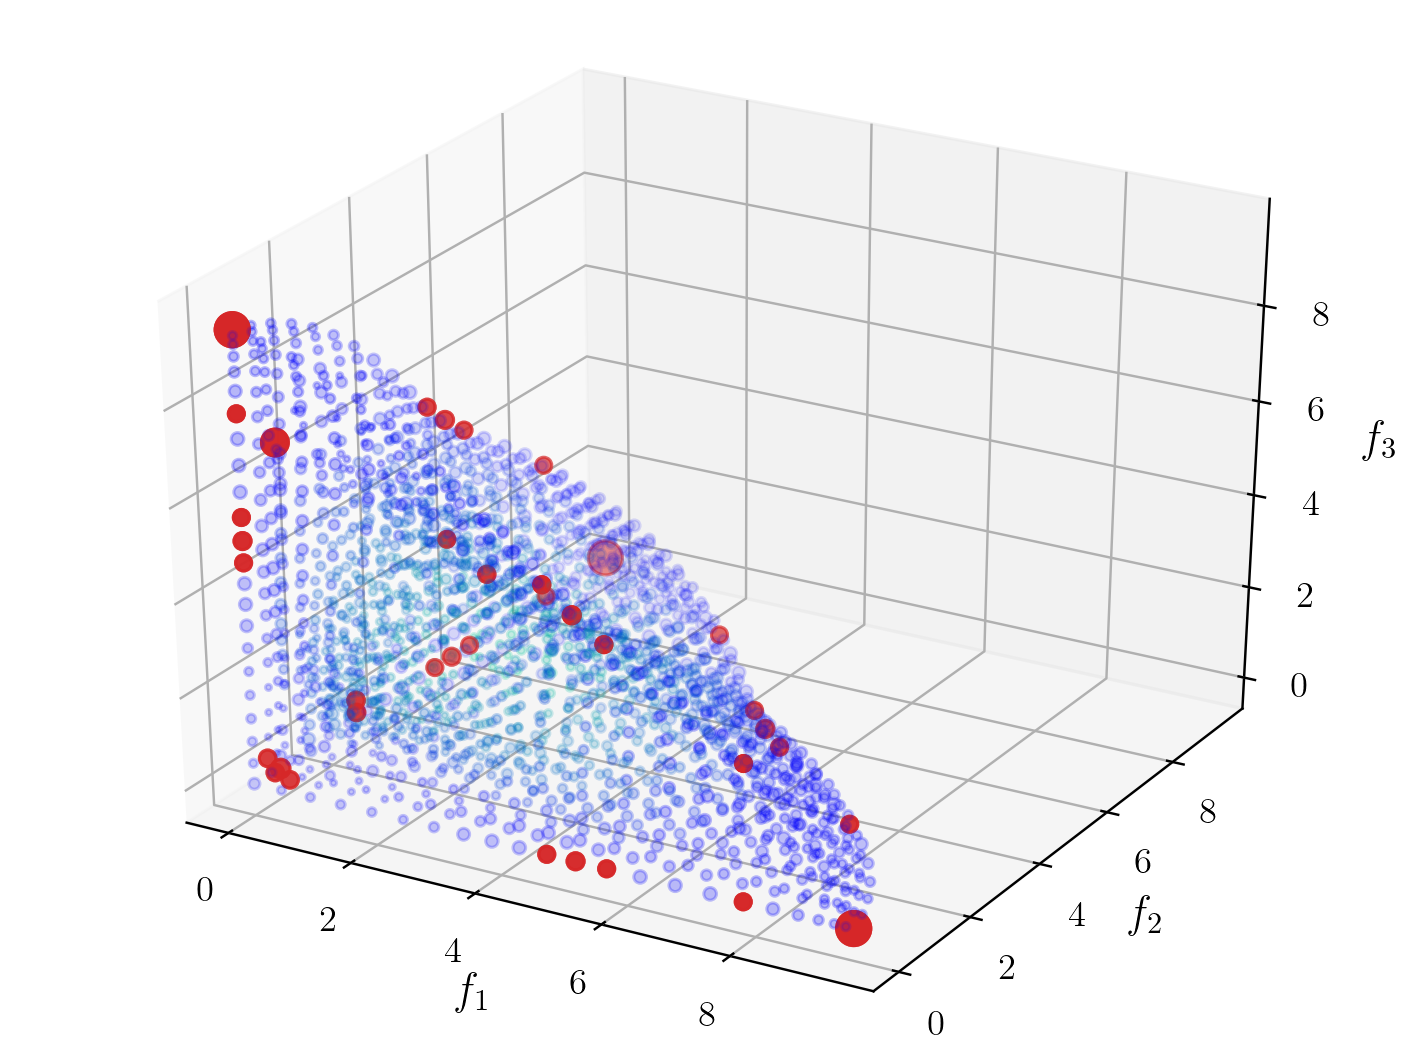

In [3]:
%matplotlib notebook
sys.path.append('../../')
from vis.plotting import scatter
from vis.plotting.scatter import camera_angles

pf,dim = 'debmdk-nbi', '4d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C = decide_size_color(CV, Mu, Ik)

    pdffigpath = os.path.join(path, "scatter3d.pdf")
    svgfigpath = os.path.join(path, "scatter3d.svg")
    with plt.rc_context({"text.usetex": True, "font.size": 12}):
        scatter.plot(F, ax=Axes3D(plt.figure()), s=S, c=C, euler=camera_angles[pf][dim])
        plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
        plt.margins(0,0,0)
        # save the fig
        plt.savefig(pdffigpath, bbox_inches='tight', pad_inches=0, dpi=150)
        plt.savefig(svgfigpath, bbox_inches='tight', pad_inches=0, dpi=150, format='svg')
        plt.show()

### Do paletteviz original

../../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', '..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


<IPython.core.display.Javascript object>


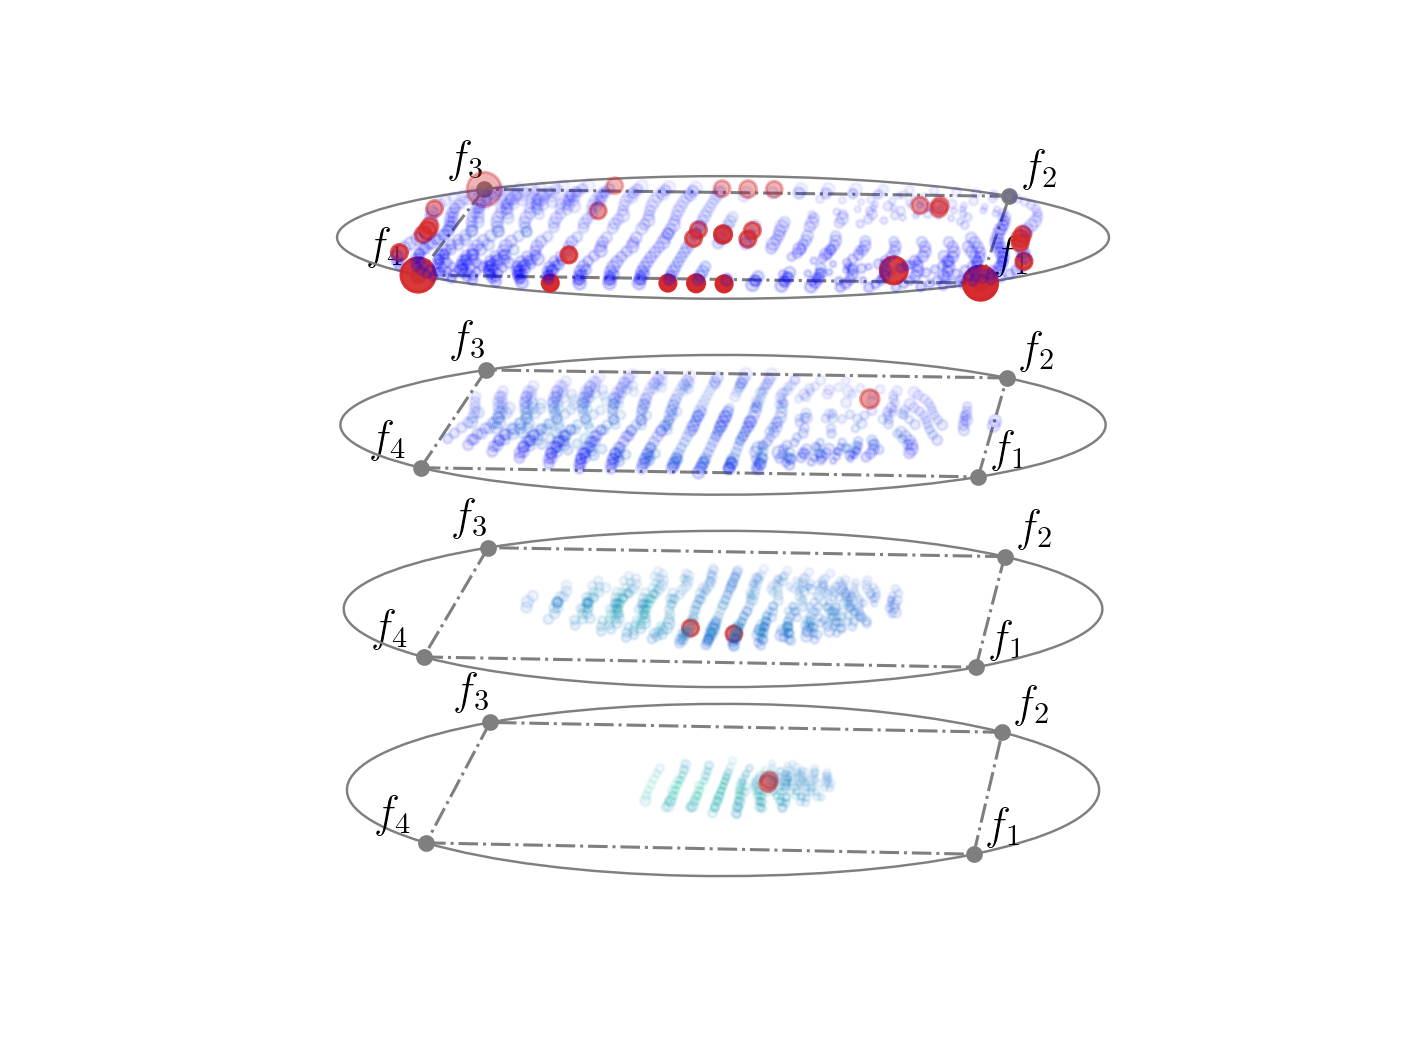

Plotting palette-star-viz.
Loading depth contours from ../../data/debmdk-nbi/4d/depth-cont-cvhull.csv.


In [4]:
%matplotlib notebook
sys.path.append('../../')
from vis.plotting import paletteviz
from vis.plotting.paletteviz import camera_angles_star

pf,dim = 'debmdk-nbi', '4d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C = decide_size_color(CV, Mu, Ik)

    pdffigpath = os.path.join(path, "palette-starviz.pdf")
    svgfigpath = os.path.join(path, "palette-starviz.svg")
    depth_contour_path = os.path.join(path, "depth-cont-cvhull.csv")
    with plt.rc_context({"text.usetex": True, "font.size": 12}):
        paletteviz.plot(F, ax=Axes3D(plt.figure()), depth_contours=depth_contour_path, mode='star', \
                        n_partitions=4, s=S, c=C, verbose=True, euler=(-40,15)) #camera_angles_star[pf][dim])
        
        # try to remove white space as much as possible
        plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
        plt.margins(0,0,0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.gca().zaxis.set_major_locator(plt.NullLocator())
        
        # save the fig
        plt.savefig(pdffigpath, bbox_inches='tight', dpi=150, pad_inches=0)
        plt.savefig(svgfigpath, bbox_inches='tight', dpi=150, pad_inches=0, format='svg')
        
        # show
        plt.show()

### Fig1: Prepare a PLV plot using following for the knee problem. 

4 levels again. Show following points:

 - `[1.5068    1.5068    1.8081    1.8081]` with brown $\mathbf{z}^d$ (same size as the original point)
 - `[1.0470    1.0470    1.5705    2.0940]` with brown, mark $\mathbf{z}^T$ (slightly bigger size)
     - put an arrow from first to second
 - `[5.1854    5.1854         0         0]` with green, mark it as $\mathbf{f}^{(0)}$.

In [5]:
from scipy.spatial import cKDTree


zd = [1.5068, 1.5068, 1.8081, 1.8081] # brown, same size
zT = [1.0470, 1.0470, 1.5705, 2.0940] # brown, bigger
f0 = [5.1854, 5.1854, 0, 0] # breen, bigger

# build a tree
tree = cKDTree(F)

# get the index for f0
_,fi = tree.query([zd, zT, f0], k=1)
print(fi)
(izd,izT,if0) = (np.array([fi[0]]), np.array([fi[1]]), np.array([fi[2]]))

[1308 1538   11]


../../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', '..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


<IPython.core.display.Javascript object>


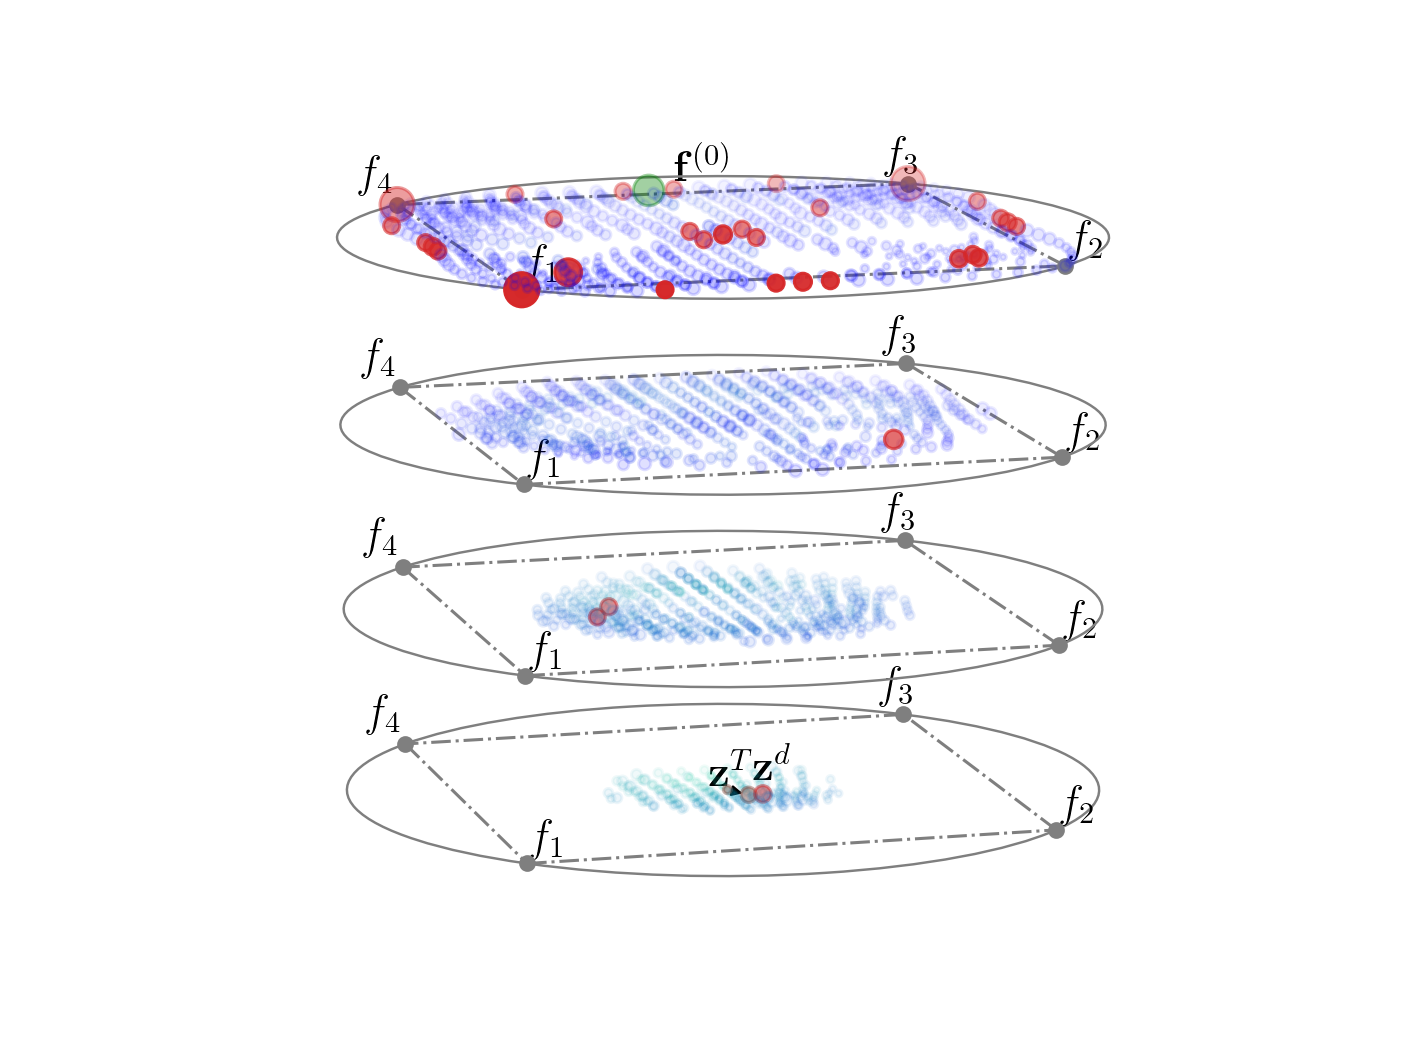

Plotting palette-star-viz.
Loading depth contours from ../../data/debmdk-nbi/4d/depth-cont-cvhull.csv.


In [6]:
%matplotlib notebook
import matplotlib.colors as mc
sys.path.append('../../')
from vis.plotting import paletteviz
from vis.plotting.paletteviz import camera_angles_star
from vis.plotting.utils import default_color, enhance_color, Arrow3D

pf,dim = 'debmdk-nbi', '4d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C = decide_size_color(CV, Mu, Ik)
    
    # change the color and size according to the requirements
    C = enhance_color(C, izd, c=mc.TABLEAU_COLORS['tab:brown'], alpha=1.0)
    # S[izd] = 25.0
    C = enhance_color(C, izT, c=mc.TABLEAU_COLORS['tab:brown'], alpha=1.0)
    S[izT] = 25.0
    C = enhance_color(C, if0, c='g', alpha=1.0)
    S[if0] = 100.0

    pdffigpath = os.path.join(path, "palette-starviz-fig1.pdf")
    svgfigpath = os.path.join(path, "palette-starviz-fig1.svg")
    depth_contour_path = os.path.join(path, "depth-cont-cvhull.csv")
    with plt.rc_context({"text.usetex": True, "font.size": 12}):
        # plot
        ax = Axes3D(plt.figure()) 
        _,P = paletteviz.plot(F, ax=ax, depth_contours=depth_contour_path, mode='star', \
                        n_partitions=4, s=S, c=C, verbose=True, euler=(30,15)) # camera_angles_star[pf][dim])
        # mark points
        ax.text(P[izd[0],0]-0.05, P[izd[0],1]+0.05, z=P[izd[0],2], s=r'$\mathbf{z}^d$', \
                ha='left', va='bottom', fontsize='large')
        ax.text(P[izT[0],0], P[izT[0],1], z=P[izT[0],2], s=r'$\mathbf{z}^T$', \
                ha='right', va='bottom', fontsize='large')
        ax.text(P[if0[0],0]-0.05, P[if0[0],1]+0.05, z=P[if0[0],2], s=r'$\mathbf{f}^{(0)}$', \
                ha='left', va='bottom', fontsize='large')
        
        # draw arrows
        a = Arrow3D(\
                [P[izd[0],0], P[izT[0],0]], \
                [P[izd[0],1], P[izT[0],1]], \
                [P[izd[0],2], P[izT[0],2]], \
                mutation_scale = 7, lw = 0.75, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        
        # try to remove white space as much as possible
        plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
        plt.margins(0,0,0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.gca().zaxis.set_major_locator(plt.NullLocator())
        
        # save the fig
        plt.savefig(pdffigpath, bbox_inches='tight', dpi=150, pad_inches=0)
        plt.savefig(svgfigpath, bbox_inches='tight', dpi=150, pad_inches=0, format='svg')
        
        # show
        plt.show()

### Fig 2: Prepare a PLV plot using following for the knee problem. 4 levels again. 

Show following points:

 - `[1.1140    1.1140    1.9496    1.9496]`, green, $\mathbf{f}^{(1)}$, same size as original point
 - `[1.0470    1.0470    1.5705    2.0940]`, green, $\mathbf{f}_p^{(1)}$
     - join first to second with an arrow. Bigger size.
 - `[4.9216    4.9216    0.4922    0.4922]`, green, $\mathbf{z}^{(1)}$, same size as original point
 - `[5.1854    5.1854         0         0]`, 
    - join first to second with an arrow. bigger size.
 - `[4.4817    4.4817    0.9959    0.9959]`, green, $\mathbf{z}^{(2)}$, same size as original point
 - `[5.0168    4.0134    1.0034    1.0034]`
    - join first to second with an arrow. bigger size.

In [7]:
from scipy.spatial import cKDTree

# build a tree
tree = cKDTree(F)

f1 = [1.1140, 1.1140, 1.9496, 1.9496]
fp1 = [1.0470, 1.0470, 1.5705, 2.0940]

z1 = [4.9216, 4.9216, 0.4922, 0.4922]
# p1 = [5.1854, 5.1854, 0, 0]
p1 = [4.9694, 4.4724, 0.4969, 0.9939]

z2 = [4.4817, 4.4817, 0.9959, 0.9959]
p2 = [5.0168, 4.0134, 1.0034, 1.0034]

# get the intermediate point indices
_,zi = tree.query([f1, fp1, z1, p1, z2, p2], k=1)
f1i,fp1i,z1i,p1i,z2i,p2i = np.array([[zi[0]], [zi[1]], [zi[2]], [zi[3]], [zi[4]], [zi[5]]])
print(zi)

[1438 1538  308  551  571  570]


../../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', '..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


<IPython.core.display.Javascript object>


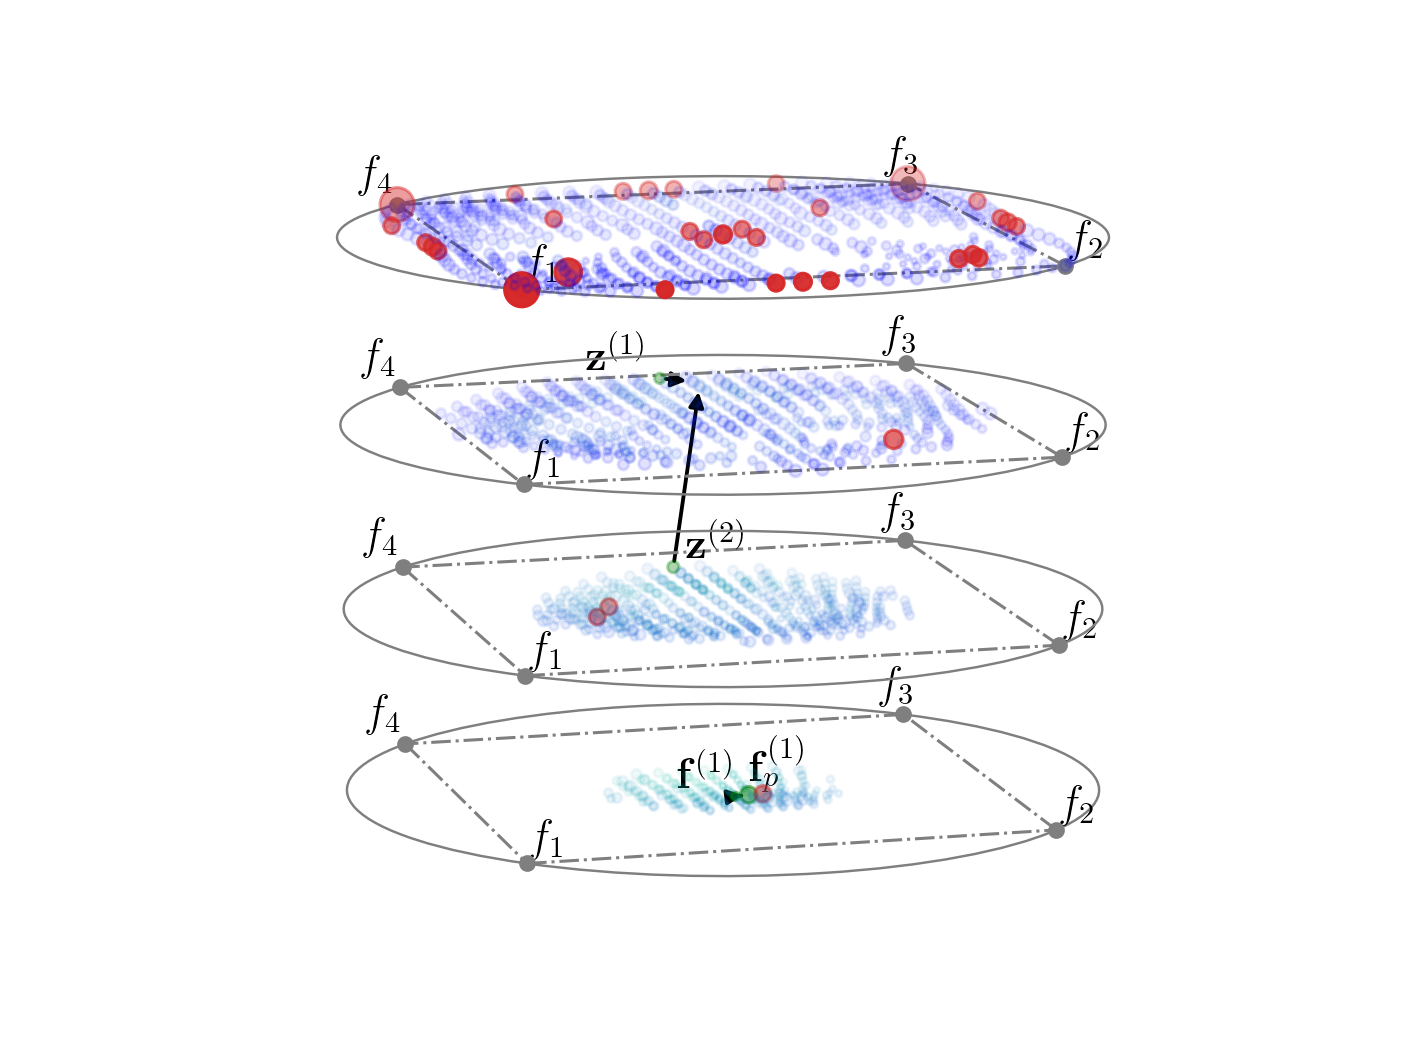

Plotting palette-star-viz.
Loading depth contours from ../../data/debmdk-nbi/4d/depth-cont-cvhull.csv.


In [8]:
%matplotlib notebook
sys.path.append('../../')
from vis.plotting import paletteviz
from vis.plotting.paletteviz import camera_angles_star
from vis.plotting.utils import default_color, enhance_color, Arrow3D

pf,dim = 'debmdk-nbi', '4d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C = decide_size_color(CV, Mu, Ik)
    
    # enhance intermediate points
    C = enhance_color(C, f1i, alpha=1.0, c='g')
    # S[f1i] = 100.0
    C = enhance_color(C, fp1i, alpha=1.0, c='g')
    # S[fp1i] = 100.0
    C = enhance_color(C, z1i, alpha=1.0, c='g')
    # S[z1i] = 100.0
    # C = enhance_color(C, p1i, alpha=1.0, c='g')
    # S[p1i] = 100.0
    C = enhance_color(C, z2i, alpha=1.0, c='g')
    # S[z2i] = 100.0
    # C = enhance_color(C, p2i, alpha=1.0, c='g')
    # S[p2i] = 100.0

    pdffigpath = os.path.join(path, "palette-starviz-fig2.pdf")
    svgfigpath = os.path.join(path, "palette-starviz-fig2.svg")
    depth_contour_path = os.path.join(path, "depth-cont-cvhull.csv")
    with plt.rc_context({"text.usetex": True, "font.size": 12}):
        ax = Axes3D(plt.figure())
        _,P = paletteviz.plot(F, ax=ax, depth_contours=depth_contour_path, mode='star', \
                        n_partitions=4, s=S, c=C, verbose=True, euler=(30,15)) # camera_angles_star[pf][dim])
        
        # mark points
        ax.text(P[f1i[0],0], P[f1i[0],1], z=P[f1i[0],2], s=r'$\mathbf{f}^{(1)}$', \
                ha='right', va='bottom', fontsize='large')
        ax.text(P[fp1i[0],0], P[fp1i[0],1], z=P[fp1i[0],2], s=r'$\mathbf{f}_p^{(1)}$', \
                ha='left', va='bottom', fontsize='large')
        ax.text(P[z1i[0],0]+0.025, P[z1i[0],1]-0.025, z=P[z1i[0],2], s=r'$\mathbf{z}^{(1)}$', \
                ha='right', va='bottom', fontsize='large')
        ax.text(P[z2i[0],0]-0.025, P[z2i[0],1]+0.025, z=P[z2i[0],2], s=r'$\mathbf{z}^{(2)}$', \
                ha='left', va='bottom', fontsize='large')
        
        # draw arrows
        a = Arrow3D(\
                [P[f1i[0],0], P[fp1i[0],0]], \
                [P[f1i[0],1], P[fp1i[0],1]], \
                [P[f1i[0],2], P[fp1i[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        a = Arrow3D(\
                [P[z1i[0],0], P[p1i[0],0]], \
                [P[z1i[0],1], P[p1i[0],1]], \
                [P[z1i[0],2], P[p1i[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        a = Arrow3D(\
                [P[z2i[0],0], P[p2i[0],0]], \
                [P[z2i[0],1], P[p2i[0],1]], \
                [P[z2i[0],2], P[p2i[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        
        # try to remove white space as much as possible
        plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
        plt.margins(0,0,0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.gca().zaxis.set_major_locator(plt.NullLocator())
        
        # save the fig
        plt.savefig(pdffigpath, bbox_inches='tight', dpi=150, pad_inches=0)
        plt.savefig(svgfigpath, bbox_inches='tight', dpi=150, pad_inches=0, format='svg')
        
        # show
        plt.show()

### Fig 3: Prepare a PLV plot using following for the knee problem. 4 levels again. 

Show following points:

 - `[5.1854    5.1854  0  0]`, green, mark it as $\mathbf{f}_p^{(0)}$
 - `[4.9216    4.9216    0.4922    0.4922]`, green, $\mathbf{z}^{(1)}$
 - `[4.4817    4.4817    0.9959    0.9959]`, green, $\mathbf{z}^{(2)}$
 - `[1.1140    1.1140    1.9496    1.9496]`, green, already marked as $\mathbf{f}^{(1)}$
    - join with multiple arrows from first to second, second to third and third to fourth.

In [10]:
pf,dim = 'debmdk-nbi', '4d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    
    muidpath = os.path.join(path, "muid.csv")
    muid = np.loadtxt(muidpath, delimiter=',', dtype=int)
    print(muid)
    
    i = (P[muid,2] >= 0.25) & (P[muid,2] < 0.74)
    print(muid[i])
    print(F[muid[i][0]])

[   0    6   10   11   12   16   22  123  139  185  191  197  198  209
  210  215  220  271  275 1240 1256 1360 1538 1629 1666 1678 1748 1749
 1760 1816 1817 1827 1870 2013 2019 2021 2022]
[ 191  215 1538 1629]
[2.384  2.384  3.9734 0.    ]


In [11]:
from scipy.spatial import cKDTree

# build a tree
tree = cKDTree(F)

fp0 = [5.1854, 5.1854, 0, 0]
z1 = [4.9216, 4.9216, 0.4922, 0.4922]
z2 = [4.4817, 4.4817, 0.9959, 0.9959]
f1 = [1.1140, 1.1140, 1.9496, 1.9496]

f1_ = [1.1140, 1.1140, 1.9496, 1.9496]
fp1_ = [1.0470, 1.0470, 1.5705, 2.0940]

z1_ = [4.9216, 4.9216, 0.4922, 0.4922]
# p1 = [5.1854, 5.1854, 0, 0]
p1_ = [4.9694, 4.4724, 0.4969, 0.9939]

z2_ = [4.4817, 4.4817, 0.9959, 0.9959]
p2_ = [5.0168, 4.0134, 1.0034, 1.0034]

p3i = [191]  #215 1538 1629

# get the intermediate point indices
_,zi = tree.query([fp0, z1, z2, f1, f1_, fp1_, z1_, p1_, z2_, p2_], k=1)
fp0i,z1i,z2i,f1i,f1i_,fp1i_,z1i_,p1i_,z2i_,p2i_ = np.array([[zi[0]], [zi[1]], [zi[2]], [zi[3]], \
                                                            [zi[4]], [zi[5]], [zi[6]], [zi[7]], \
                                                            [zi[8]], [zi[9]]])
print(zi)

[  11  308  571 1438 1438 1538  308  551  571  570]


../../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', '..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


<IPython.core.display.Javascript object>


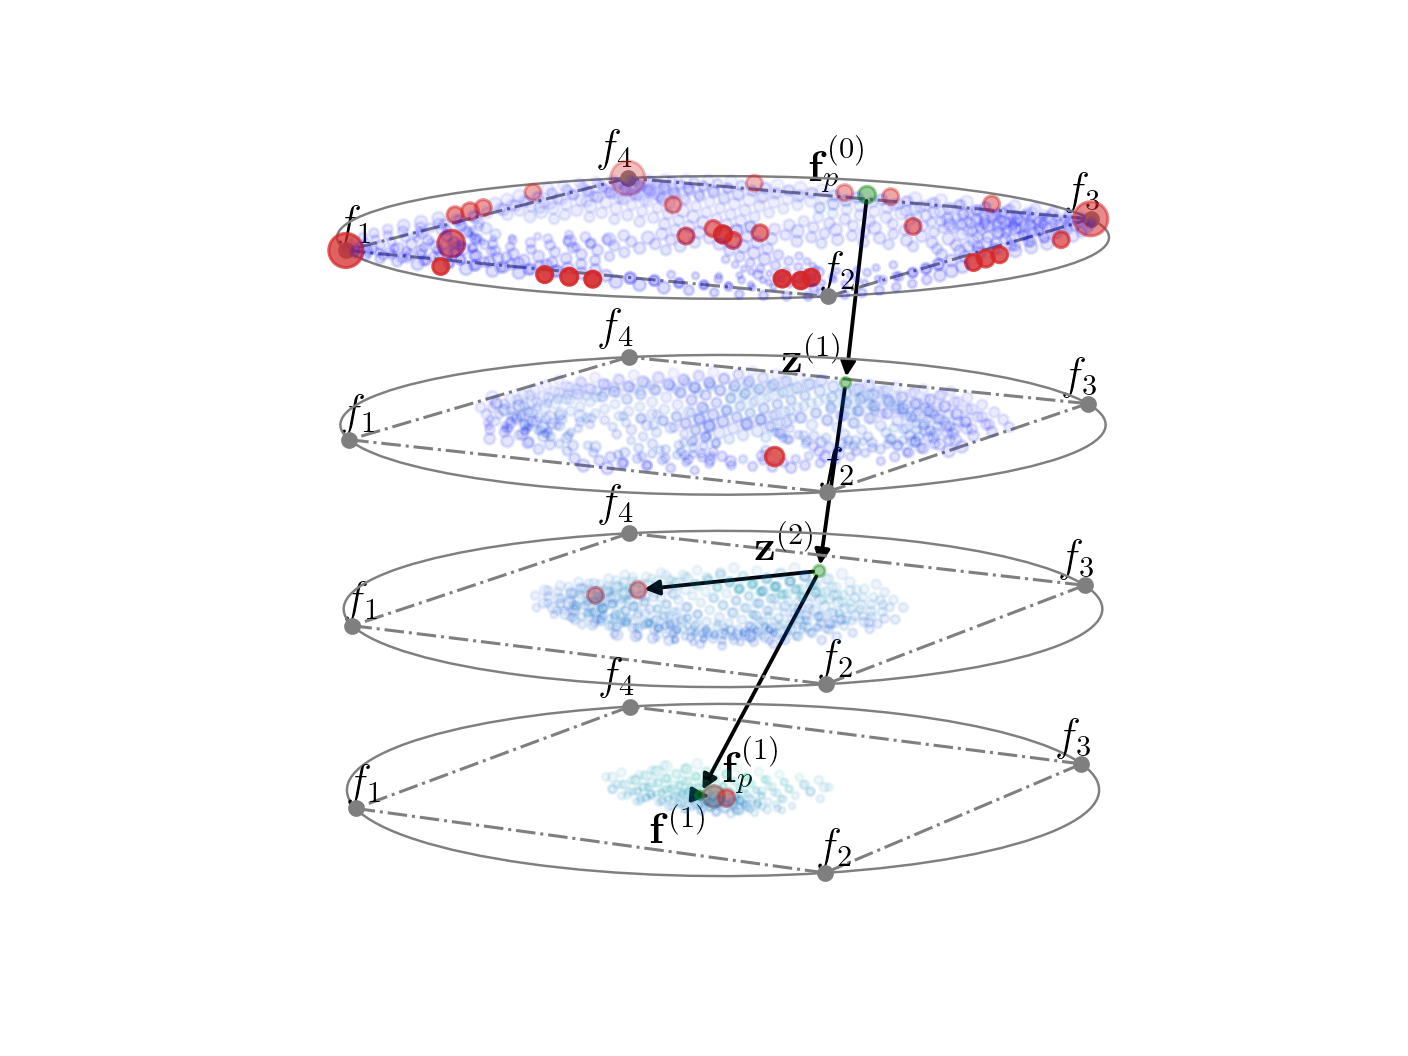

Plotting palette-star-viz.
Loading depth contours from ../../data/debmdk-nbi/4d/depth-cont-cvhull.csv.


In [12]:
%matplotlib notebook
import matplotlib.colors as mc
sys.path.append('../../')
from vis.plotting import paletteviz
from vis.plotting.paletteviz import camera_angles_star
from vis.plotting.utils import default_color, enhance_color, Arrow3D

pf,dim = 'debmdk-nbi', '4d'

fullpathf = "../../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
if os.path.exists(fullpathf):
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]

    # load the front
    F = np.loadtxt(fullpathf, delimiter=',')
    print(fullpathf, F.shape, dirs, frontname)

    CV, Mu, Ik = load_props(path)
    S,C = decide_size_color(CV, Mu, Ik)
    
    # enhance intermediate points
    C = enhance_color(C, fp0i, alpha=1.0, c='g')
    # S[fp1i] = 100.0
    C = enhance_color(C, z1i, alpha=1.0, c='g')
    # S[z1i] = 100.0
    C = enhance_color(C, z2i, alpha=1.0, c='g')
    # S[f2i] = 100.0
    C = enhance_color(C, f1i, alpha=1.0, c='g')
    # S[f2_i] = 100.0
    
    # enhance intermediate points
    C = enhance_color(C, f1i_, alpha=1.0, c='g')
    # S[f1i] = 100.0
    C = enhance_color(C, fp1i_, alpha=1.0, c=mc.TABLEAU_COLORS['tab:brown'])
    S[fp1i_] = 50.0
    C = enhance_color(C, z1i_, alpha=1.0, c='g')
    # S[z1i] = 100.0
    # C = enhance_color(C, p1i_, alpha=1.0, c=mc.TABLEAU_COLORS['tab:brown'])
    # S[p1i_] = 25.0
    C = enhance_color(C, z2i_, alpha=1.0, c='g')
    # S[z2i_] = 50.0
    # C = enhance_color(C, p2i_, alpha=1.0, c=mc.TABLEAU_COLORS['tab:brown'])
    # S[p2i] = 25.0

    pdffigpath = os.path.join(path, "palette-starviz-fig3.pdf")
    svgfigpath = os.path.join(path, "palette-starviz-fig3.svg")
    depth_contour_path = os.path.join(path, "depth-cont-cvhull.csv")
    with plt.rc_context({"text.usetex": True, "font.size": 12}):
        ax = Axes3D(plt.figure())
        _,P = paletteviz.plot(F, ax=ax, depth_contours=depth_contour_path, mode='star', \
                        n_partitions=4, s=S, c=C, verbose=True, euler=(75,15)) # camera_angles_star[pf][dim])
        
        # mark points
        ax.text(P[fp0i[0],0], P[fp0i[0],1], z=P[fp0i[0],2], s=r'$\mathbf{f}_p^{(0)}$', \
                ha='right', va='bottom', fontsize='large')
        ax.text(P[z1i[0],0], P[z1i[0],1]-0.03, z=P[z1i[0],2], s=r'$\mathbf{z}^{(1)}$', \
                ha='right', va='bottom', fontsize='large')
        ax.text(P[z2i[0],0], P[z2i[0],1]-0.03, z=P[z2i[0],2], s=r'$\mathbf{z}^{(2)}$', \
                ha='right', va='bottom', fontsize='large')
        # ax.text(P[f1i[0],0], P[f1i[0],1]+0.05, z=P[f1i[0],2], s=r'$\mathbf{f}^{(1)}$', \
        #        ha='left', va='bottom', fontsize='large')
        
        # mark points
        ax.text(P[f1i_[0],0]-0.025, P[f1i_[0],1], z=P[f1i_[0],2]-0.025, s=r'$\mathbf{f}^{(1)}$', \
                ha='right', va='top', fontsize='large')
        ax.text(P[fp1i_[0],0]-0.025, P[fp1i_[0],1], z=P[fp1i_[0],2], s=r'$\mathbf{f}_p^{(1)}$', \
                ha='left', va='bottom', fontsize='large')
        # ax.text(P[z1i_[0],0]+0.025, P[z1i_[0],1]-0.025, z=P[z1i_[0],2], s=r'$\mathbf{z}^{(1)}$', \
        #        ha='right', va='bottom', fontsize='large')
        # ax.text(P[z2i_[0],0]-0.025, P[z2i_[0],1]+0.025, z=P[z2i_[0],2], s=r'$\mathbf{z}^{(2)}$', \
        #        ha='left', va='bottom', fontsize='large')
        
        # draw arrows
        a = Arrow3D(\
                [P[fp0i[0],0], P[z1i[0],0]], \
                [P[fp0i[0],1], P[z1i[0],1]], \
                [P[fp0i[0],2], P[z1i[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        a = Arrow3D(\
                [P[z1i[0],0], P[z2i[0],0]], \
                [P[z1i[0],1], P[z2i[0],1]], \
                [P[z1i[0],2], P[z2i[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        a = Arrow3D(\
                [P[z2i[0],0], P[f1i[0],0]], \
                [P[z2i[0],1], P[f1i[0],1]], \
                [P[z2i[0],2], P[f1i[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        
        # draw arrows
        a = Arrow3D(\
                [P[f1i_[0],0], P[fp1i_[0],0]], \
                [P[f1i_[0],1], P[fp1i_[0],1]], \
                [P[f1i_[0],2], P[fp1i_[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
#         a = Arrow3D(\
#                 [P[z1i_[0],0], P[p1i_[0],0]], \
#                 [P[z1i_[0],1], P[p1i_[0],1]], \
#                 [P[z1i_[0],2], P[p1i_[0],2]], \
#                 mutation_scale = 10, lw = 1.25, \
#                 arrowstyle = "-|>", color = 'black')
#         ax.add_artist(a)
#         a = Arrow3D(\
#                 [P[z2i_[0],0], P[p2i_[0],0]], \
#                 [P[z2i_[0],1], P[p2i_[0],1]], \
#                 [P[z2i_[0],2], P[p2i_[0],2]], \
#                 mutation_scale = 10, lw = 1.25, \
#                 arrowstyle = "-|>", color = 'black')
        a = Arrow3D(\
                [P[z2i_[0],0], P[p3i[0],0]], \
                [P[z2i_[0],1], P[p3i[0],1]], \
                [P[z2i_[0],2], P[p3i[0],2]], \
                mutation_scale = 10, lw = 1.25, \
                arrowstyle = "-|>", color = 'black')
        ax.add_artist(a)
        
        # try to remove white space as much as possible
        plt.subplots_adjust(top=0.01, bottom=0, right=0.01, left=0, hspace=0, wspace=0)
        plt.margins(0,0,0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.gca().zaxis.set_major_locator(plt.NullLocator())
        
        # save the fig
        plt.savefig(pdffigpath, bbox_inches='tight', dpi=150, pad_inches=0)
        plt.savefig(svgfigpath, bbox_inches='tight', dpi=150, pad_inches=0, format='svg')
        
        # show
        plt.show()